# TITANIC PROJECT
This project is about analysing dataset from Titanic passengers. 
The aim is to go throught the dataset and get the insights and conclussions from the data. 

### What you can find there:

- Data cleaning and preprocessing data
    - Understanding the dataset and make changes accordingly to work on it
    - Create new variables from the existing one for better analysis and visualizations. 
    - KNN Nulls cleaning
    - Labelencoder to create correlation matrix

- EDA
    - Survival rate by different variables
    - Comparison of survival rate
    - Correlation between variables and survival rate

- Visualizations
    - Charts visualizations

- Machine Learning
    - ML Automatic model on survival rate. Created from the original dataset. 



### DATA

- Import libraries
- Import csv to create dataframe
- Understand size and type of variables and values of the dataframe
- Chech if duplicates and nulls

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import KNNImputer


In [3]:
df = pd.read_csv('data/titanic_train2.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### DATA CLEANING AND PREPROCESSING

#### New variables
- FamilyGroup: join SibSp and Parch in one column to understand the group families as one
- AgeGroup: create buckets of Age for a better visualization. I will create this new variable after the Nulls replacement
- Title: Get the titles of the passengers from their names
- Type of Ticket

#### Drop Variables
- PassengerID
- SibSP and Parch as I have now FamilyGroup
- Cabin as I have Type of Cabin
- Ticket as I have Type of ticket
- Name: no relevant info for analysis

#### Nulls
- Cabin. After some tries to understand its impact I decided to remove the column. The percentage of nulls is too big to work with it. 
- Embarked. There are only 2 nulls. I will replace them with the mode, as I see Southhampton is by far the most common. 
- Age. I want to keep the info. I will replace it with KNN Method. As I want to create a new variable AgeGroup based on Age, I need to fill the nulls before.



#### New Variables

In [9]:
family_columns = df.filter(like='SibSp').columns.tolist() + df.filter(like='Parch').columns.tolist()
df['FamilyGroup'] = df[family_columns].sum(axis=1)
df['FamilyGroup'].value_counts()

FamilyGroup
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [10]:
df['Type of Ticket'] = df['Ticket'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).strip() if any(c.isalpha() for c in x) else 'Numeric')
df['Type of Ticket'].value_counts()

Type of Ticket
Numeric        661
PC              60
C.A.            27
A/              13
STON/O .        12
A/.             10
W./C.            9
CA.              8
SOTON/O.Q.       8
SOTON/OQ         7
STON/O.          6
CA               6
F.C.C.           5
C                5
SC/PARIS         5
S.O.C.           5
LINE             4
SC/Paris         4
PP               3
S.O./P.P.        3
A..              2
A./.             2
WE/P             2
P/PP             2
SC/AH            2
SOTON/O          2
S.C./PARIS       2
S.W./PP          1
F.C.             1
SC/AH Basle      1
A/S              1
SO/C             1
SW/PP            1
SC               1
SCO/W            1
W.E.P.           1
W/C              1
Fa               1
S.O.P.           1
S.C./A..         1
S.P.             1
A.               1
C.A./SOTON       1
Name: count, dtype: int64

In [11]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()

Title
Mr              517
Miss            185
Mrs             126
Master           40
Rare             22
the Countess      1
Name: count, dtype: int64

#### Drop Variables

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyGroup,Type of Ticket,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,A/,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,PC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,STON/O.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Numeric,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Numeric,Mr


In [13]:
df.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Name'], inplace=True) 

#### Nulls

'Cabin': try to understand it further but I decide to remove this column and to keep the new Type of Cabin. Having the data grouped might be more insightful.

In [14]:
# Create a new variable 'Type of Cabin' with the first letter of the column 'Cabin'
#take the first letter of the cabin
df['Type of Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')
df['Type of Cabin'].value_counts()

Type of Cabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

In [15]:
df.drop(columns=['Cabin'], inplace=True) 

Replace 'Embarked' with mode

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Replace 'Age' with KNN Method:


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [18]:
df_encoded = df.copy()

In [19]:
#select the categorical columns to encode them
categorical_cols = df_encoded.select_dtypes(include='object').columns
categorical_cols

Index(['Sex', 'Embarked', 'Type of Ticket', 'Title', 'Type of Cabin'], dtype='object')

In [20]:
encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col].astype(str))
    encoders[col] = encoder

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             714 non-null    float64
 4   Fare            891 non-null    float64
 5   Embarked        891 non-null    int64  
 6   FamilyGroup     891 non-null    int64  
 7   Type of Ticket  891 non-null    int64  
 8   Title           891 non-null    int64  
 9   Type of Cabin   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [22]:
df_encoded.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup,Type of Ticket,Title,Type of Cabin
0,0,3,1,22.0,7.2500,2,1,3,2,8
1,1,1,0,38.0,71.2833,0,1,17,3,2
2,1,3,0,26.0,7.9250,2,0,37,1,8
3,1,1,0,35.0,53.1000,2,1,15,3,2
4,0,3,1,35.0,8.0500,2,0,15,2,8


In [23]:
# Escale the data
# KNN measures the distance between values and the big values might affect its precission. 
# ie: Fare could be much higher than Age or Pclass. If we scale the data first, we make sure all the variables have the same importance when we impute them

# 1. Identify numeric columns
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# 2. Escale only numerical columns
scaler = StandardScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df_encoded[numerical_cols]), columns=numerical_cols)

# Apply KNN Imputer only over the numerical columns 
imputer = KNNImputer(n_neighbors=5)
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled_numerical), columns=numerical_cols)

# Reescale the data to the original format after the imputation
df_imputed_numerical = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=numerical_cols)

# Replace the imputed numerical columns in the original Dataframe
df_imputed = df_encoded.copy()
df_imputed[numerical_cols] = df_imputed_numerical

# Verify if we have nulls after the impute
print(df_imputed.isnull().sum())

Survived          0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
FamilyGroup       0
Type of Ticket    0
Title             0
Type of Cabin     0
dtype: int64


After the nulls modification, we can create the AgeGroup Variable

In [24]:
df_imputed['AgeGroup'] = pd.cut(df_imputed['Age'], bins=[0, 10, 18, 30, 50, 100], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df_imputed['AgeGroup'].value_counts()

AgeGroup
Adult          338
Middle-aged    312
Teen            94
Child           75
Senior          72
Name: count, dtype: int64

In [25]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    float64 
 1   Pclass          891 non-null    float64 
 2   Sex             891 non-null    float64 
 3   Age             891 non-null    float64 
 4   Fare            891 non-null    float64 
 5   Embarked        891 non-null    float64 
 6   FamilyGroup     891 non-null    float64 
 7   Type of Ticket  891 non-null    float64 
 8   Title           891 non-null    float64 
 9   Type of Cabin   891 non-null    float64 
 10  AgeGroup        891 non-null    category
dtypes: category(1), float64(10)
memory usage: 70.8 KB


In [26]:
df_imputed.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup,Type of Ticket,Title,Type of Cabin,AgeGroup
0,0.0,3.0,1.0,22.0,7.2500,2.0,1.0,3.0,2.0,8.0,Adult
1,1.0,1.0,0.0,38.0,71.2833,0.0,1.0,17.0,3.0,2.0,Middle-aged
2,1.0,3.0,0.0,26.0,7.9250,2.0,0.0,37.0,1.0,8.0,Adult
3,1.0,1.0,0.0,35.0,53.1000,2.0,1.0,15.0,3.0,2.0,Middle-aged
4,0.0,3.0,1.0,35.0,8.0500,2.0,0.0,15.0,2.0,8.0,Middle-aged


### EDA



In [27]:
df_imputed.to_csv('data/df_imputed.csv') #primero guardo este csv ya que voy a crear uno numerico para crear correlaciones despues

As I want to generate same type of graphs to compare different variables vs Survived, I create a function

In [28]:
def combo_chart(column, colors=['#b8c410', '#0c143d']):
    # Contamos los sobrevivientes y los fallecidos agrupados por la columna
    survived = df_imputed[df_imputed['Survived'] == 1][column].value_counts()
    dead = df_imputed[df_imputed['Survived'] == 0][column].value_counts()
    
    # Combinamos los conteos en un DataFrame, alineando los índices
    combined_df = pd.DataFrame({'Survived': survived, 'Dead': dead})
    
    # Reemplazamos los NaN con 0 para evitar problemas al graficar
    combined_df = combined_df.fillna(0)
    
    # Calculamos el total por categoría y el porcentaje de supervivencia
    combined_df['Total'] = combined_df['Survived'] + combined_df['Dead']
    combined_df['Survival Rate (%)'] = (combined_df['Survived'] / combined_df['Total']) * 100
    
    # Crear el gráfico de barras apilado
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    combined_df[['Survived', 'Dead']].plot(kind='bar', stacked=True, color=colors, ax=ax1)
    
    # Configuramos el primer eje (para las barras)
    ax1.set_ylabel('Count')
    ax1.set_title(f'Survival rate by {column}')
    
    # Crear un segundo eje para la tasa de supervivencia
    ax2 = ax1.twinx()
    
    # Graficamos la tasa de supervivencia como una línea
    ax2.plot(combined_df.index, combined_df['Survival Rate (%)'], color='red', marker='o', linestyle='-', label='Survival Rate (%)')
    ax2.set_ylabel('Survival Rate (%)')
    ax2.set_ylim(0, 100)  # Aseguramos que el eje vaya de 0 a 100%
    
    # Añadimos los valores del porcentaje en la línea
    for idx, rate in enumerate(combined_df['Survival Rate (%)']):
        ax2.annotate(f'{rate:.1f}%', (idx, rate), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='red')
    
    # Mostramos la leyenda y el gráfico
    ax2.legend(loc='upper left')
    plt.show()

As I want to make correlation matrix later, I want to keep the numerical df. I will create a copy of the df_imputed and then reverse encode the imputed dataframe for visualizations. 

Then I will do the inverse encoder so I can have the origina categories in my dataframe

In [29]:
df_numerical = df_imputed.copy()

In [30]:
for col, encoder in encoders.items():
    # Verifica si la columna está en un tipo compatible
    if df_imputed[col].dtype == 'float64':
        # Convierte la columna a int
        df_imputed[col] = df_imputed[col].astype(int)

    # Ahora aplica inverse_transform
    df_imputed[col] = encoder.inverse_transform(df_imputed[col])



In [31]:
df_imputed.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup,Type of Ticket,Title,Type of Cabin,AgeGroup
0,0.0,3.0,male,22.0,7.2500,S,1.0,A/,Mr,Unknown,Adult
1,1.0,1.0,female,38.0,71.2833,C,1.0,PC,Mrs,C,Middle-aged
2,1.0,3.0,female,26.0,7.9250,S,0.0,STON/O.,Miss,Unknown,Adult
3,1.0,1.0,female,35.0,53.1000,S,1.0,Numeric,Mrs,C,Middle-aged
4,0.0,3.0,male,35.0,8.0500,S,0.0,Numeric,Mr,Unknown,Middle-aged


In [32]:
df_imputed.to_csv('data/df_imputed2.csv')

#### AgeGroup

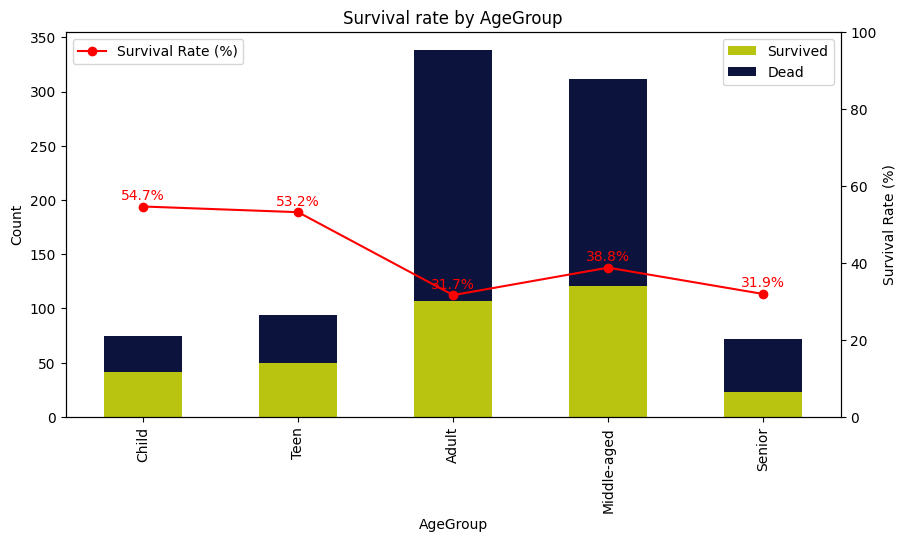

In [33]:
combo_chart('AgeGroup')

### PClass

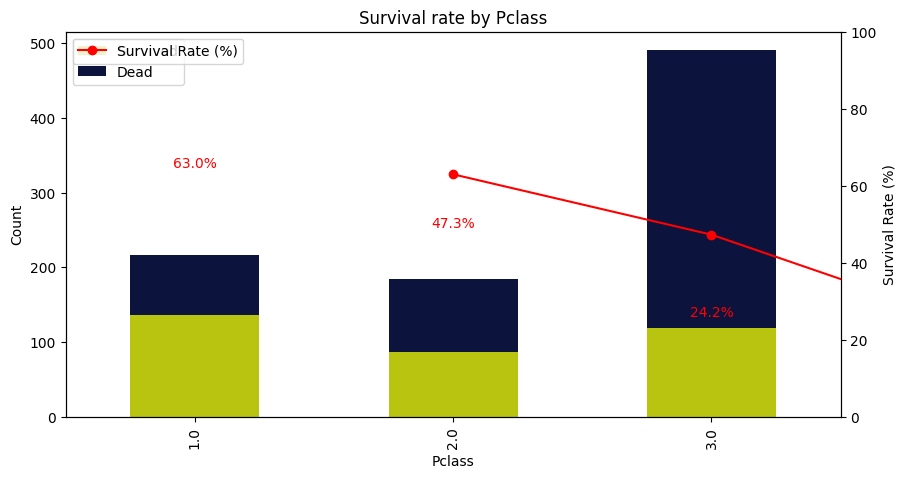

In [34]:
combo_chart('Pclass')

### Sex

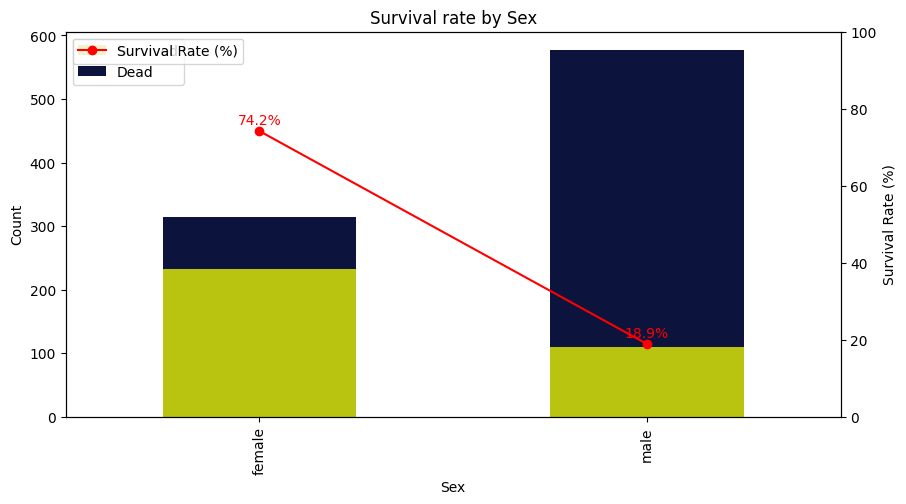

In [35]:
combo_chart('Sex')

#### Combo Graph to compare Sex Vs PClass

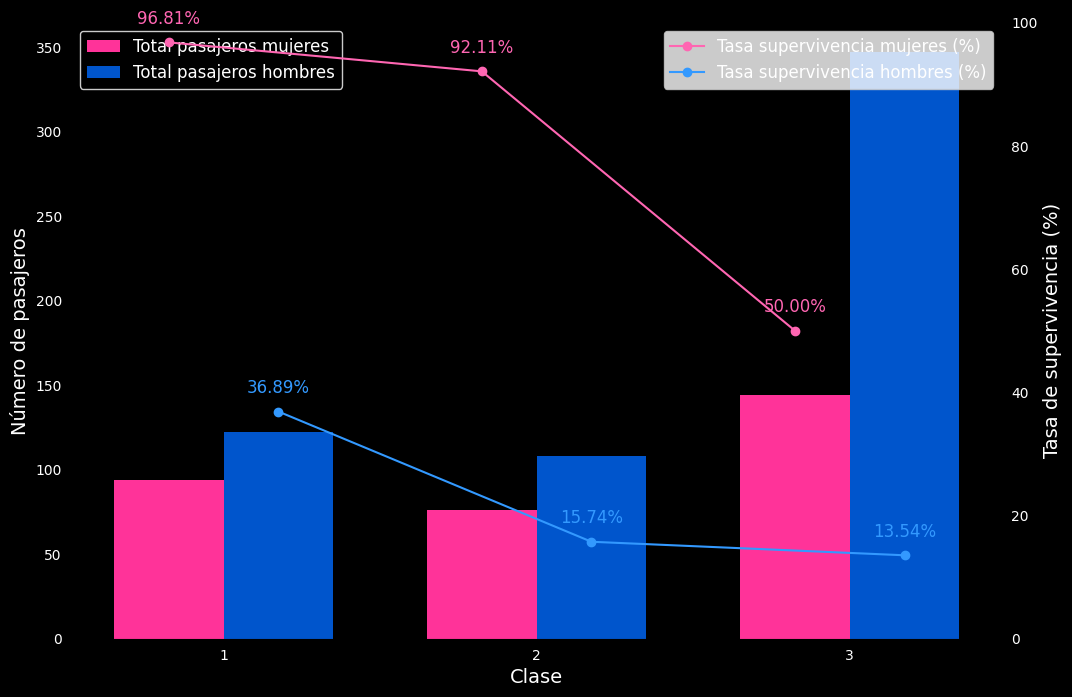

In [36]:
# Filtrar por sexo
df_female = df_imputed[df_imputed['Sex'] == 'female']
df_male = df_imputed[df_imputed['Sex'] == 'male']

# Número absoluto de mujeres y hombres por clase
female_count = df_female.groupby('Pclass').size()
male_count = df_male.groupby('Pclass').size()

# Tasa de supervivencia por clase
female_survival_rate = df_female.groupby('Pclass')['Survived'].mean() * 100
male_survival_rate = df_male.groupby('Pclass')['Survived'].mean() * 100

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')  # Fondo negro para la figura

# Posiciones en el eje x para las barras
bar_width = 0.35
positions_female = [p - bar_width/2 for p in female_count.index]
positions_male = [p + bar_width/2 for p in male_count.index]

# Gráfico de barras para el número absoluto de mujeres y hombres por clase
ax1.bar(positions_female, female_count.values, width=bar_width, color='#ff3399', label='Total pasajeros mujeres')
ax1.bar(positions_male, male_count.values, width=bar_width, color='#0055cc', label='Total pasajeros hombres')
ax1.set_xlabel('Clase', fontsize=14, color='white')
ax1.set_ylabel('Número de pasajeros', color='white', fontsize=14)
ax1.set_xticks(female_count.index)
ax1.tick_params(axis='y', labelcolor='white', labelsize=10)
ax1.tick_params(axis='x', labelcolor='white', labelsize=10)
ax1.legend(loc='upper left', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
ax1.grid(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

ax1.set_facecolor('black')

ax2 = ax1.twinx()
ax2.plot(positions_female, female_survival_rate.values, color='#ff66b2', marker='o', linestyle='-', label='Tasa supervivencia mujeres (%)')
ax2.plot(positions_male, male_survival_rate.values, color='#3399ff', marker='o', linestyle='-', label='Tasa supervivencia hombres (%)')
ax2.set_ylabel('Tasa de supervivencia (%)', color='white', fontsize=14)
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='white', labelsize=10)
ax2.grid(False)
ax2.legend(loc='upper right', fontsize=12, labelcolor='white')

# Fondo negro para el gráfico
ax2.set_facecolor('black')

# Añadir las etiquetas de las tasas de supervivencia
for i, v in enumerate(female_survival_rate):
    ax2.text(positions_female[i], v + 3, f"{v:.2f}%", color='#ff66b2', ha='center', fontsize=12)

for i, v in enumerate(male_survival_rate):
    ax2.text(positions_male[i], v + 3, f"{v:.2f}%", color='#3399ff', ha='center', fontsize=12)


plt.show()


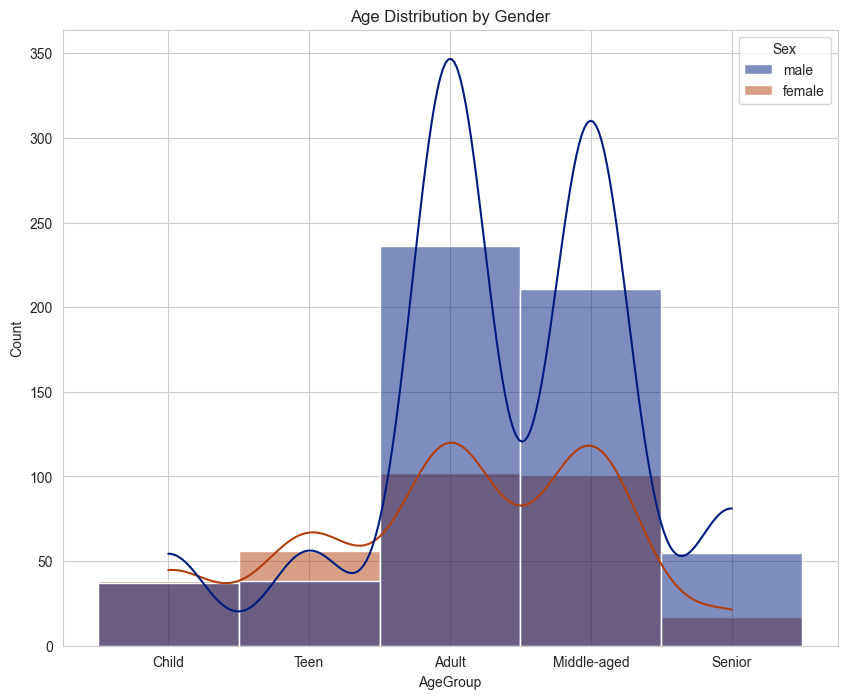

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_imputed, x='AgeGroup', kde=True, hue='Sex', palette ='dark')
plt.title('Age Distribution by Gender')
plt.show()

#### Sex Variable exploration: Women total passenges, Age and survival rate

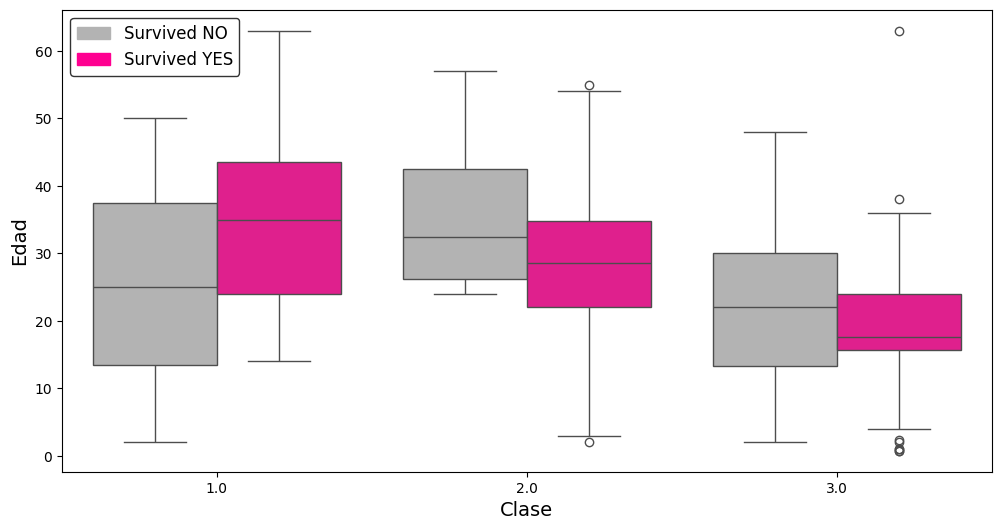

In [37]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12, 6), facecolor='white')  

# Crear el boxplot con los colores personalizados
sns.boxplot(data=df_female, x='Pclass', y='Age', hue='Survived', 
            palette={0: "#b3b3b3", 1: '#ff0091'}) 

# Títulos y etiquetas
plt.xlabel('Clase', fontsize=14, color='black')
plt.ylabel('Edad', fontsize=14, color='black')

# Crear los parches manualmente para la leyenda
survived_patch = mpatches.Patch(color='#ff0091', label='Survived YES')
dead_patch = mpatches.Patch(color='#b3b3b3', label='Survived NO')

# Añadir la leyenda con los parches personalizados
legend = plt.legend(handles=[dead_patch, survived_patch], loc='upper left', facecolor='white', edgecolor='black', fontsize=12)
for text in legend.get_texts():
    text.set_color('black')

# Cambiar el color de las etiquetas del eje x e y
plt.xticks(color='black')
plt.yticks(color='black')

# Cambiar el fondo del gráfico a blanco
plt.gca().set_facecolor('white')

# Mostrar el gráfico
plt.show()


#### Survival Rate comparing Embarked, Vs PClass and Sex

/var/folders/3k/lkz67hk967s8dvyhg9zrqdz80000gn/T/ipykernel_34764/363620000.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex', col='Embarked',


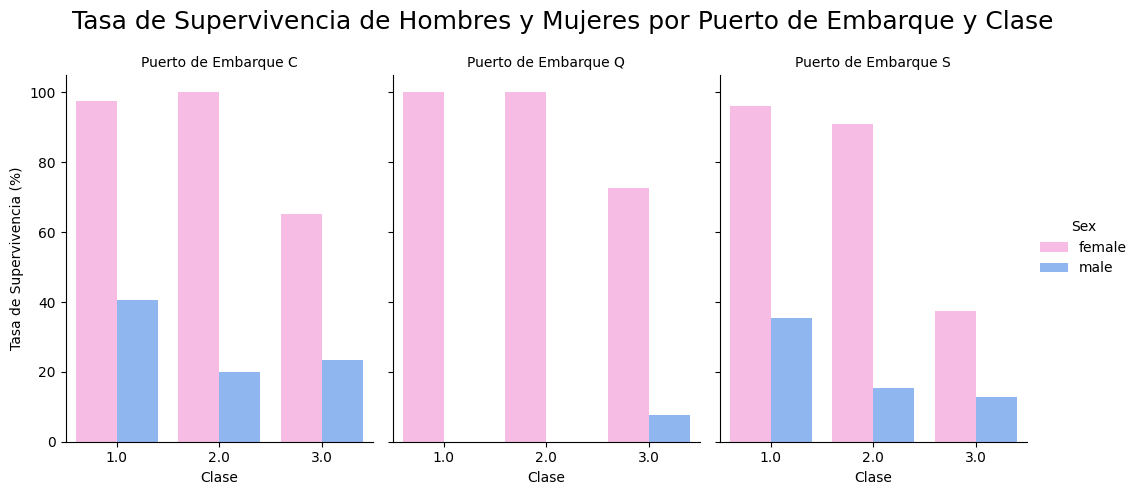

In [44]:
# Calcular la tasa de supervivencia
survival_rates = df_imputed.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates['Survived'] = survival_rates['Survived'] * 100  # Convertir a porcentaje

custom_palette = {'female': '#ffb3e6', 'male': '#80b3ff'}

g = sns.catplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex', col='Embarked', 
                kind='bar', height=5, aspect=0.7, palette=custom_palette, ci=None)

# Configurar títulos y etiquetas
g.set_titles("Puerto de Embarque {col_name}")
g.set_axis_labels("Clase", "Tasa de Supervivencia (%)")
g.fig.suptitle('Tasa de Supervivencia de Hombres y Mujeres por Puerto de Embarque y Clase', fontsize=18)
plt.subplots_adjust(top=0.85)  # Ajustar el espacio para el título

# Mostrar el gráfico
plt.show()



### Children Vs PClass

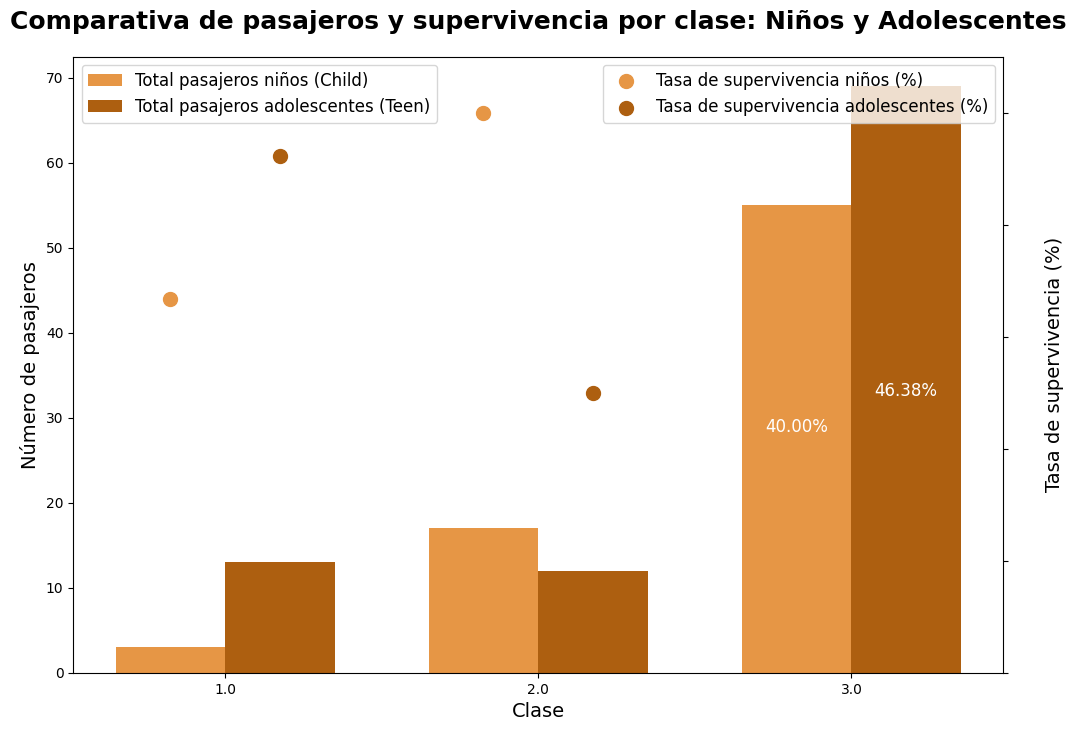

In [38]:
# Filtrar por niños (Child) y adolescentes (Teen) en función de AgeGroup
df_children = df_imputed[df_imputed['AgeGroup'] == 'Child']
df_teens = df_imputed[df_imputed['AgeGroup'] == 'Teen']

# Número absoluto de niños y adolescentes por clase
children_count = df_children.groupby('Pclass').size()
teens_count = df_teens.groupby('Pclass').size()

# Tasa de supervivencia por clase para niños y adolescentes
children_survival_rate = df_children.groupby('Pclass')['Survived'].mean() * 100
teens_survival_rate = df_teens.groupby('Pclass')['Survived'].mean() * 100

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 8))

# Posiciones en el eje x para las barras
bar_width = 0.35
positions_children = children_count.index  # Posiciones de las clases
positions_teens = [p + bar_width for p in children_count.index]  # Desplazar las posiciones para los adolescentes

# Gráfico de barras para el número absoluto de niños y adolescentes por clase
ax1.bar(positions_children, children_count.values, width=bar_width, color='#e69645', label='Total pasajeros niños (Child)')  # Verde claro
ax1.bar(positions_teens, teens_count.values, width=bar_width, color='#ad5f10', label='Total pasajeros adolescentes (Teen)')  # Verde oscuro
ax1.set_xlabel('Clase', fontsize=14)
ax1.set_ylabel('Número de pasajeros', color='black', fontsize=14)
ax1.set_xticks([p + bar_width / 2 for p in positions_children])  # Ajustar ticks al centro de las barras
ax1.set_xticklabels(children_count.index)  # Usar etiquetas originales
ax1.tick_params(axis='y', labelcolor='black', labelsize=10)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Crear segundo eje Y para la tasa de supervivencia
ax2 = ax1.twinx()
ax2.scatter(positions_children, children_survival_rate.values, color='#e69645', s=100, label='Tasa de supervivencia niños (%)')  # Verde claro
ax2.scatter(positions_teens, teens_survival_rate.values, color='#ad5f10', s=100, label='Tasa de supervivencia adolescentes (%)')  # Verde oscuro
ax2.set_ylabel('Tasa de supervivencia (%)', color='black', fontsize=14)
ax2.set_ylim(0, 110)  # Ajustar límite superior a 110%
ax2.tick_params(axis='y', labelcolor='white', labelsize=10)
ax2.grid(False)
ax2.legend(loc='upper right', fontsize=12)

# Añadir las etiquetas de las tasas de supervivencia sobre los puntos
for i, v in enumerate(children_survival_rate):
    ax2.text(positions_children[i], v + 3, f"{v:.2f}%", color='white', ha='center', fontsize=12)

for i, v in enumerate(teens_survival_rate):
    ax2.text(positions_teens[i], v + 3, f"{v:.2f}%", color='white', ha='center', fontsize=12)

# Título del gráfico con un ajuste para evitar solapamientos
plt.title('Comparativa de pasajeros y supervivencia por clase: Niños y Adolescentes', fontsize=18, fontweight='bold', pad=20)
plt.show()





### Family Group

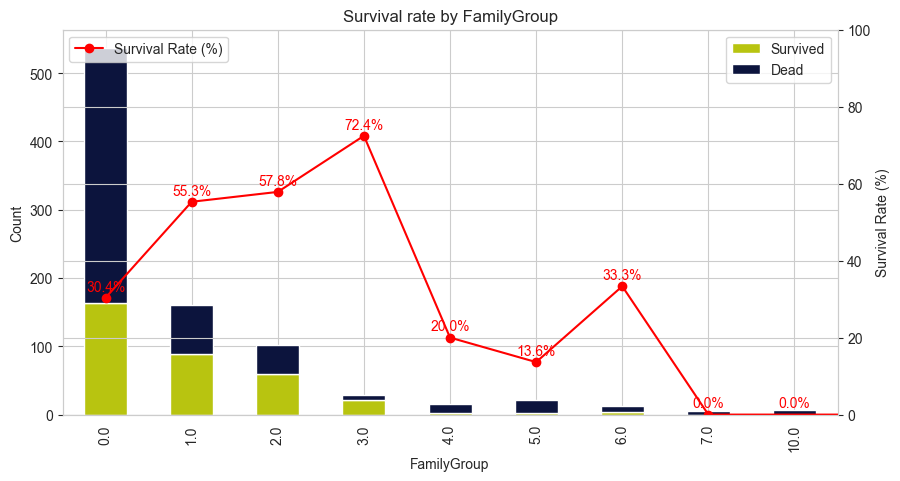

In [47]:
combo_chart('FamilyGroup')

#### FamilyGroup Vs PClass

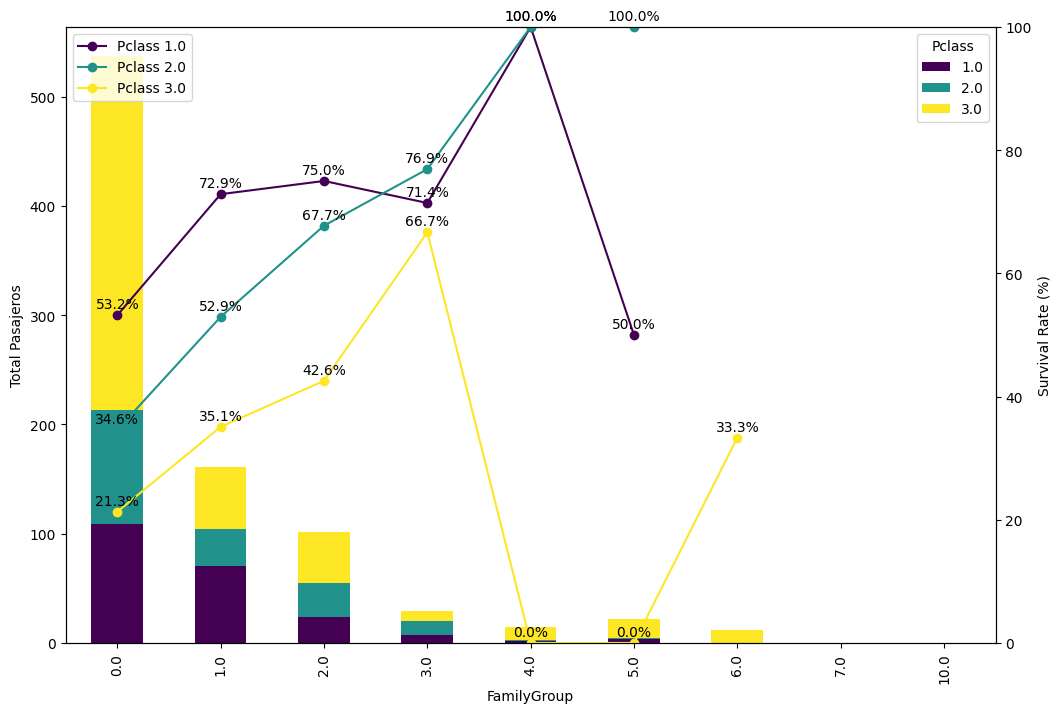

In [40]:
# Contamos los sobrevivientes y los fallecidos agrupados por FamilyGroup y Pclass
survived = df_imputed[df_imputed['Survived'] == 1].groupby(['FamilyGroup', 'Pclass']).size().unstack(fill_value=0)
dead = df_imputed[df_imputed['Survived'] == 0].groupby(['FamilyGroup', 'Pclass']).size().unstack(fill_value=0)

# Combinamos los conteos en un DataFrame
combined_df = pd.DataFrame({'Survived': survived.stack(), 'Dead': dead.stack()}).reset_index()
combined_df.columns = ['FamilyGroup', 'Pclass', 'Survived', 'Dead']

combined_df['Total'] = combined_df['Survived'] + combined_df['Dead']
combined_df['Survival Rate (%)'] = (combined_df['Survived'] / combined_df['Total']) * 100

fig, ax1 = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_df['Pclass'].unique())))
combined_df.pivot(index='FamilyGroup', columns='Pclass', values='Total').plot(kind='bar', stacked=True, ax=ax1, color=colors)

# Configuramos el primer eje (para las barras)
ax1.set_ylabel('Total Pasajeros')
ax1.grid(False)  

# Crear un segundo eje para la tasa de supervivencia
ax2 = ax1.twinx()

# Graficamos la tasa de supervivencia como una línea
for pclass, color in zip(combined_df['Pclass'].unique(), colors):
    subset = combined_df[combined_df['Pclass'] == pclass]
    ax2.plot(subset['FamilyGroup'], subset['Survival Rate (%)'], marker='o', linestyle='-', label=f'Pclass {pclass}', color=color)

ax2.set_ylabel('Survival Rate (%)')
ax2.set_ylim(0, 100)  # Aseguramos que el eje vaya de 0 a 100%
ax2.grid(False)  # Eliminar el grid

# Añadimos los valores del porcentaje en la línea
for pclass in combined_df['Pclass'].unique():
    subset = combined_df[combined_df['Pclass'] == pclass]
    for idx, rate in enumerate(subset['Survival Rate (%)']):
        ax2.annotate(f'{rate:.1f}%', (subset['FamilyGroup'].iloc[idx], rate), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Mostramos la leyenda y el gráfico
ax2.legend(loc='upper left')
plt.show()

### Embarked

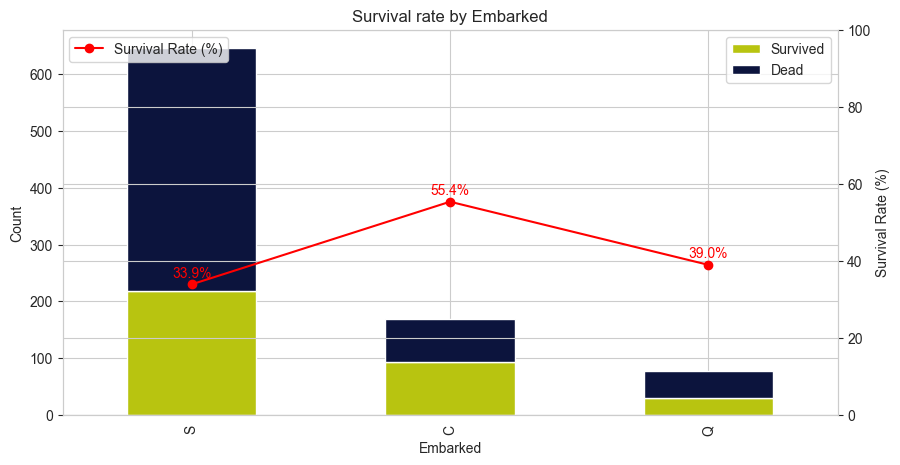

In [48]:
combo_chart('Embarked')

#### Embarked Vs PClass

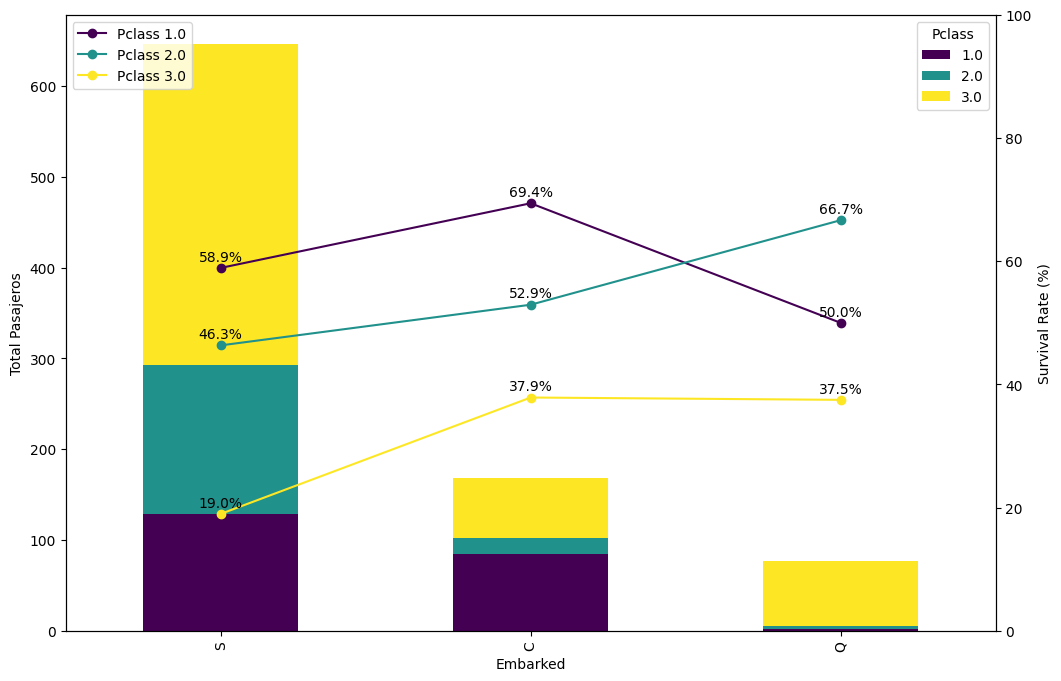

In [41]:
# Contamos los sobrevivientes y los fallecidos agrupados por Embarked y Pclass
survived = df_imputed[df_imputed['Survived'] == 1].groupby(['Embarked', 'Pclass']).size().unstack(fill_value=0)
dead = df_imputed[df_imputed['Survived'] == 0].groupby(['Embarked', 'Pclass']).size().unstack(fill_value=0)

# Combinamos los conteos en un DataFrame
combined_df = pd.DataFrame({'Survived': survived.stack(), 'Dead': dead.stack()}).reset_index()
combined_df.columns = ['Embarked', 'Pclass', 'Survived', 'Dead']

combined_df['Total'] = combined_df['Survived'] + combined_df['Dead']
combined_df['Survival Rate (%)'] = (combined_df['Survived'] / combined_df['Total']) * 100

# Reordenar el DataFrame para que las barras estén en el orden S, C, Q
combined_df['Embarked'] = pd.Categorical(combined_df['Embarked'], categories=['S', 'C', 'Q'], ordered=True)
combined_df.sort_values('Embarked', inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_df['Pclass'].unique())))
combined_df.pivot(index='Embarked', columns='Pclass', values='Total').plot(kind='bar', stacked=True, ax=ax1, color=colors)

# Configuramos el primer eje (para las barras)
ax1.set_ylabel('Total Pasajeros')
ax1.grid(False)  

# Crear un segundo eje para la tasa de supervivencia
ax2 = ax1.twinx()

# Graficamos la tasa de supervivencia como una línea
for pclass, color in zip(combined_df['Pclass'].unique(), colors):
    subset = combined_df[combined_df['Pclass'] == pclass]
    ax2.plot(subset['Embarked'], subset['Survival Rate (%)'], marker='o', linestyle='-', label=f'Pclass {pclass}', color=color)

ax2.set_ylabel('Survival Rate (%)')
ax2.set_ylim(0, 100)  # Aseguramos que el eje vaya de 0 a 100%
ax2.grid(False)  # Eliminar el grid

# Añadimos los valores del porcentaje en la línea
for pclass in combined_df['Pclass'].unique():
    subset = combined_df[combined_df['Pclass'] == pclass]
    for idx, rate in enumerate(subset['Survival Rate (%)']):
        ax2.annotate(f'{rate:.1f}%', (subset['Embarked'].iloc[idx], rate), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Mostramos la leyenda y el gráfico
ax2.legend(loc='upper left')
plt.show()

### Title

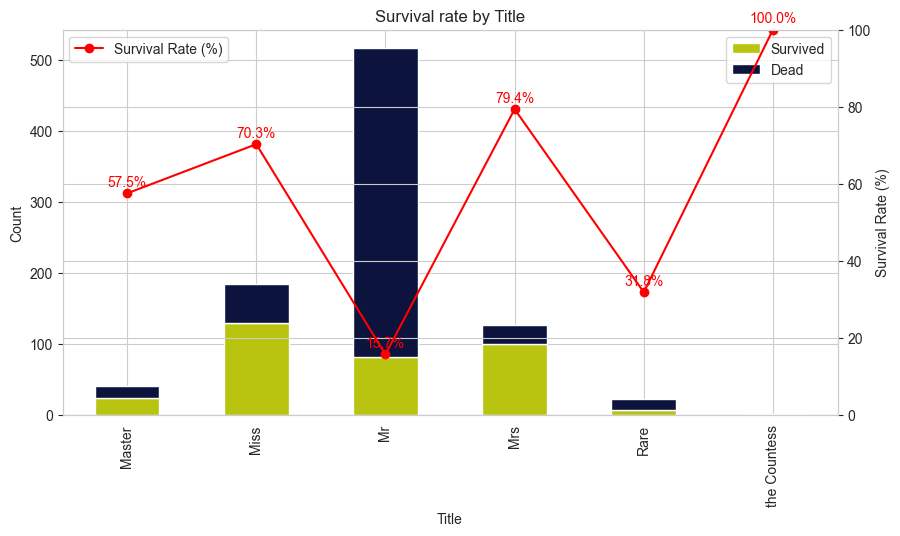

In [49]:
combo_chart('Title')

### Type of Ticket

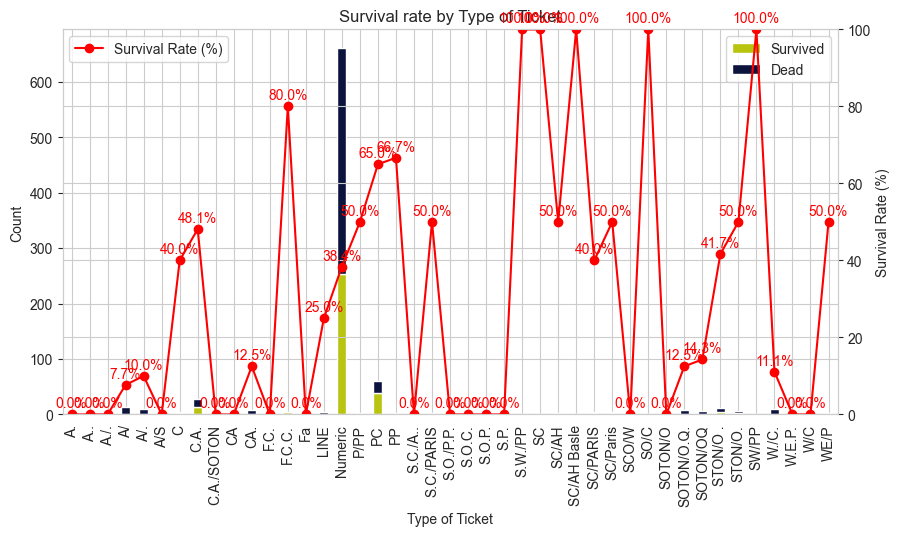

In [50]:
combo_chart('Type of Ticket')

### Type of Cabin

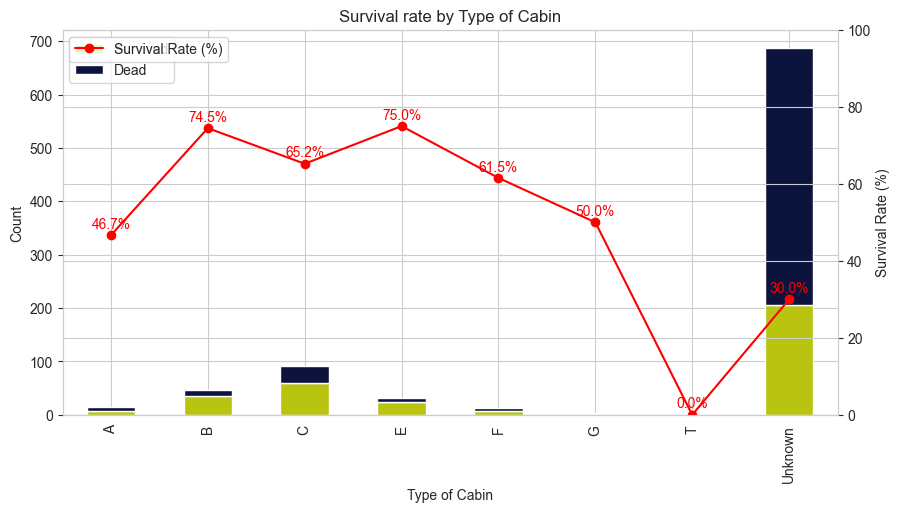

In [51]:
combo_chart('Type of Cabin')

### Variables Distribution

In [53]:
for col in df_imputed.select_dtypes(include=['float', 'int']).columns:
    fig = px.box(df_imputed, y=col, title=f'Distribución de {col}')
    fig.show()

### Correlation matrix


In [54]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    float64 
 1   Pclass          891 non-null    float64 
 2   Sex             891 non-null    float64 
 3   Age             891 non-null    float64 
 4   Fare            891 non-null    float64 
 5   Embarked        891 non-null    float64 
 6   FamilyGroup     891 non-null    float64 
 7   Type of Ticket  891 non-null    float64 
 8   Title           891 non-null    float64 
 9   Type of Cabin   891 non-null    float64 
 10  AgeGroup        891 non-null    category
dtypes: category(1), float64(10)
memory usage: 70.8 KB


In [55]:
df_numerical.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup,Type of Ticket,Title,Type of Cabin,AgeGroup
0,0.0,3.0,1.0,22.0,7.2500,2.0,1.0,3.0,2.0,8.0,Adult
1,1.0,1.0,0.0,38.0,71.2833,0.0,1.0,17.0,3.0,2.0,Middle-aged
2,1.0,3.0,0.0,26.0,7.9250,2.0,0.0,37.0,1.0,8.0,Adult
3,1.0,1.0,0.0,35.0,53.1000,2.0,1.0,15.0,3.0,2.0,Middle-aged
4,0.0,3.0,1.0,35.0,8.0500,2.0,0.0,15.0,2.0,8.0,Middle-aged


Delete AgeGroup from the numerical dataframe

In [56]:
df_numerical.drop(columns=['AgeGroup'], inplace=True) 

In [57]:
df_numerical.skew()

Survived          0.478523
Pclass           -0.630548
Sex              -0.618921
Age               0.339631
Fare              4.787317
Embarked         -1.264823
FamilyGroup       2.727441
Type of Ticket    1.978501
Title            -0.004566
Type of Cabin    -1.546140
dtype: float64

In [79]:
corr_matrix = df_numerical.corr(method='spearman')
corr_matrix_rounded = np.round(corr_matrix, 2)
mask = np.triu(np.ones_like(corr_matrix_rounded, dtype=bool), k=1)  # k=1 oculta la diagonal
masked_corr_matrix = np.where(mask, np.nan, corr_matrix_rounded)


fig = px.imshow(masked_corr_matrix, 
                 text_auto=True, 
                 aspect='auto', 
                 title='Matriz de Correlación',
                 color_continuous_scale='viridis')

fig.update_layout(xaxis=dict(tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
                  yaxis=dict(tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
                  height=800, 
                  width=800)


fig.show()

### MACHINE LEARNING

In [59]:
from pycaret.classification import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [60]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    float64 
 1   Pclass          891 non-null    float64 
 2   Sex             891 non-null    object  
 3   Age             891 non-null    float64 
 4   Fare            891 non-null    float64 
 5   Embarked        891 non-null    object  
 6   FamilyGroup     891 non-null    float64 
 7   Type of Ticket  891 non-null    object  
 8   Title           891 non-null    object  
 9   Type of Cabin   891 non-null    object  
 10  AgeGroup        891 non-null    category
dtypes: category(1), float64(5), object(5)
memory usage: 70.8+ KB


In [61]:
df_imputed

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup,Type of Ticket,Title,Type of Cabin,AgeGroup
0,0.0,3.0,male,22.0,7.2500,S,1.0,A/,Mr,Unknown,Adult
1,1.0,1.0,female,38.0,71.2833,C,1.0,PC,Mrs,C,Middle-aged
2,1.0,3.0,female,26.0,7.9250,S,0.0,STON/O.,Miss,Unknown,Adult
3,1.0,1.0,female,35.0,53.1000,S,1.0,Numeric,Mrs,C,Middle-aged
4,0.0,3.0,male,35.0,8.0500,S,0.0,Numeric,Mr,Unknown,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,13.0000,S,0.0,Numeric,Rare,Unknown,Adult
887,1.0,1.0,female,19.0,30.0000,S,0.0,Numeric,Miss,B,Adult
888,0.0,3.0,female,18.8,23.4500,S,3.0,W./C.,Miss,Unknown,Adult
889,1.0,1.0,male,26.0,30.0000,C,0.0,Numeric,Mr,C,Adult


In [62]:
setup(data=df_imputed.drop(['FamilyGroup', 'Type of Ticket', 'Title', 'Type of Cabin', 'AgeGroup', 'Fare'],axis=1), target='Survived', session_id=357)

,Description,Value
0,Session id,357
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 5)"
4,Transformed data shape,"(891, 7)"
5,Transformed train set shape,"(623, 7)"
6,Transformed test set shape,"(268, 7)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [63]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8010,0.8468,0.6946,0.7749,0.7298,0.5731,0.5779,0.0130
gbc,Gradient Boosting Classifier,0.7962,0.8619,0.6656,0.7749,0.7144,0.5577,0.5631,0.0140
ridge,Ridge Classifier,0.7930,0.8456,0.6866,0.7592,0.7186,0.5558,0.5599,0.0070
lda,Linear Discriminant Analysis,0.7930,0.8458,0.6908,0.7569,0.7198,0.5565,0.5603,0.0110
lr,Logistic Regression,0.7834,0.8453,0.6699,0.7474,0.7030,0.5338,0.5389,0.2680
lightgbm,Light Gradient Boosting Machine,0.7818,0.8494,0.6658,0.7461,0.7003,0.5303,0.5355,0.1370
rf,Random Forest Classifier,0.7787,0.8473,0.6658,0.7448,0.6977,0.5247,0.5312,0.0260
et,Extra Trees Classifier,0.7771,0.8061,0.6489,0.7500,0.6908,0.5185,0.5259,0.0270
xgboost,Extreme Gradient Boosting,0.7722,0.8375,0.6656,0.7289,0.6923,0.5128,0.5173,0.0130
dt,Decision Tree Classifier,0.7707,0.7612,0.6364,0.7458,0.6807,0.5044,0.5135,0.0070


In [64]:
ada = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8878,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.7778,0.7799,0.6667,0.7273,0.6957,0.5212,0.5224
2,0.7937,0.8376,0.6667,0.7619,0.7111,0.5517,0.5547
3,0.7742,0.8534,0.7826,0.6667,0.7200,0.5328,0.5376
4,0.7903,0.8410,0.7083,0.7391,0.7234,0.5547,0.5550
5,0.7903,0.8015,0.6667,0.7619,0.7111,0.5477,0.5507
6,0.8226,0.8300,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.7419,0.7522,0.6667,0.6667,0.6667,0.4561,0.4561
8,0.8871,0.9616,0.7917,0.9048,0.8444,0.7565,0.7606


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
save_model(ada, 'ada_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Pclass', 'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex', 'Embarked'],
                                     transform...
                  TransformerWrapper(exclude=None, include=['Embarked'],
                                     transformer=OneHotEncoder(cols=['Embarked'],
                       